In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
# Loading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]
data = pd.read_csv(url, header=None, names=column_names, na_values=" ?", skipinitialspace=True)

# Displaying the first few rows of the dataset
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  3

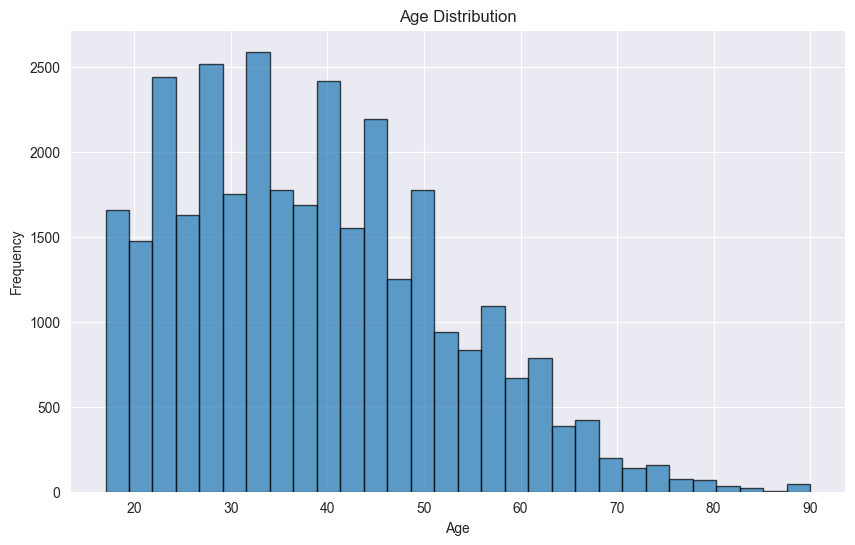

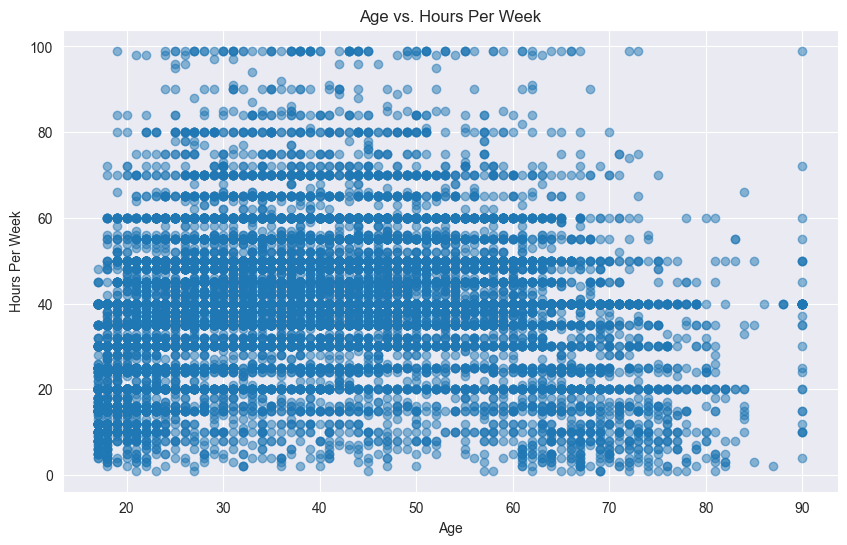

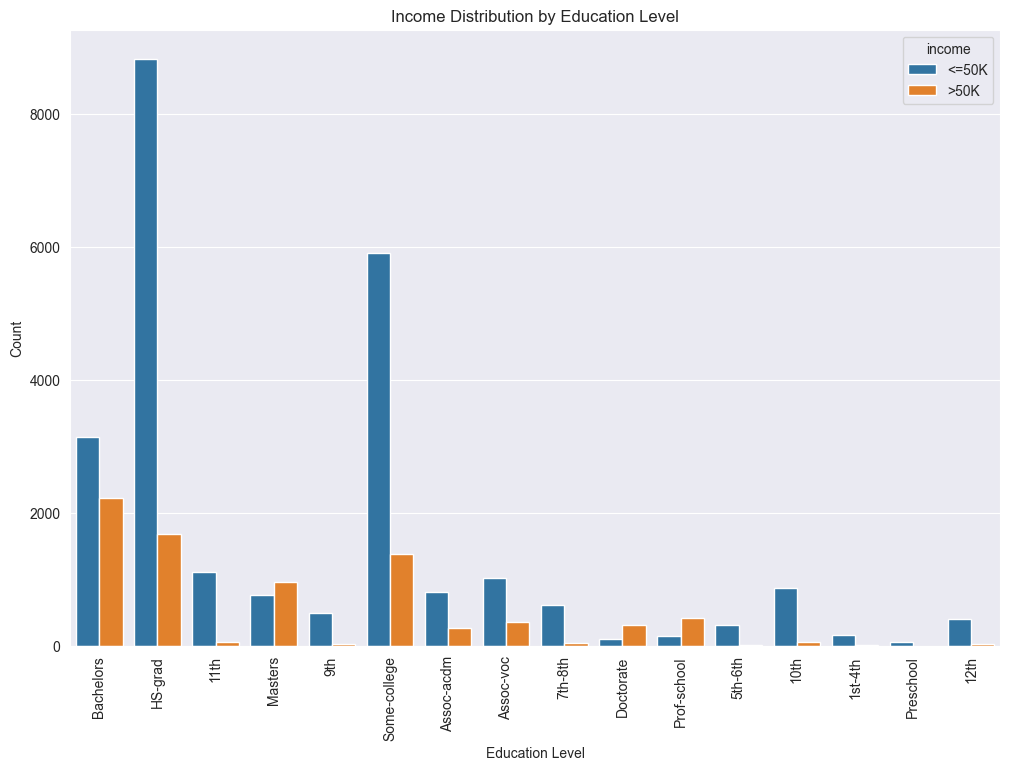

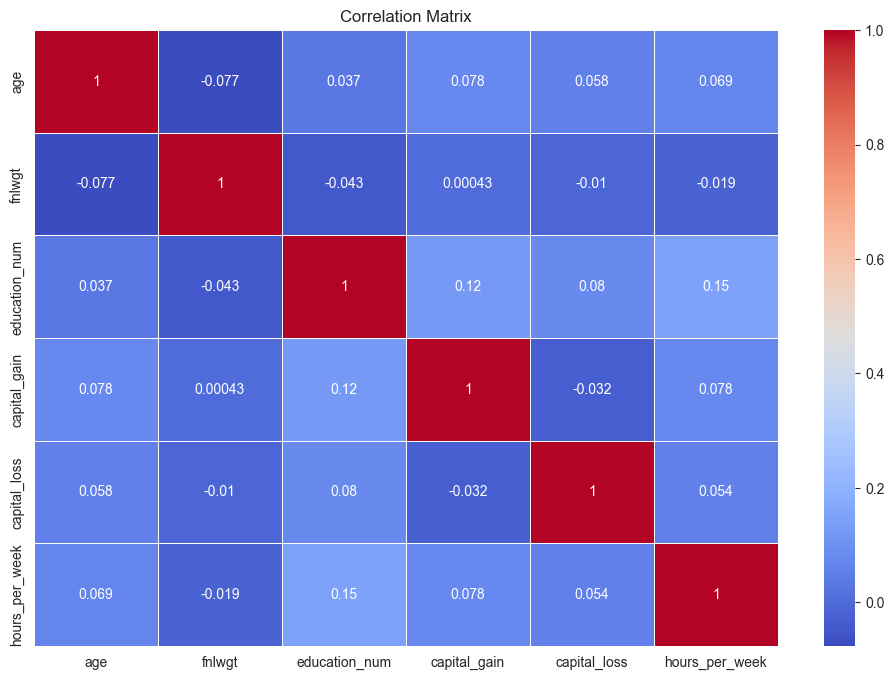

Chi-squared test statistic: 4429.653302288619
p-value: 0.0


In [6]:
# Data Cleaning: Handling missing values
data.dropna(inplace=True)

# Data Overview
print(data.info())
print(data.describe())

# Univariate Analysis: Age Distribution
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis: Age vs. Hours Per Week
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['hours_per_week'], alpha=0.5)
plt.title('Age vs. Hours Per Week')
plt.xlabel('Age')
plt.ylabel('Hours Per Week')
plt.show()

# Categorical Analysis: Income Distribution by Education Level
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='education', hue='income')
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Statistical Analysis: Correlation Matrix (excluding non-numeric columns)
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Hypothesis Testing: Income vs. Education Level
# Null hypothesis: There is no significant difference in income levels across different education levels
education_income_crosstab = pd.crosstab(data['education'], data['income'])
chi2, p, dof, expected = stats.chi2_contingency(education_income_crosstab)
print(f'Chi-squared test statistic: {chi2}')
print(f'p-value: {p}')

# Saving the clean dataset
data.to_csv('clean_adult_data.csv', index=False)